<h4>8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.</h4>

In [1]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

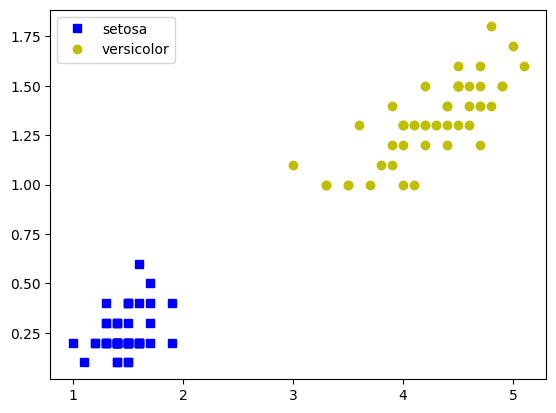

In [2]:
setosa_or_versicolor = (y == 0) | (y == 1) # setosa or versicolor
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # setosa
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo") # versicolor
plt.legend(["setosa", "versicolor"])

In [3]:
C = 5
alpha = 1 / (C * len(X))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svc = SVC(kernel="linear", C=C)
linear_svc = LinearSVC(C=C, loss="hinge", random_state=42, dual=True)
sgd_classifier = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

svc.fit(X_scaled, y)
linear_svc.fit(X_scaled, y)
sgd_classifier.fit(X_scaled, y)

print("SVC:  ", svc.intercept_, svc.coef_)
print("LinearSVC:  ", linear_svc.intercept_, linear_svc.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_classifier.alpha), sgd_classifier.intercept_, sgd_classifier.coef_)

SVC:   [0.31896852] [[1.1203284  1.02625193]]
LinearSVC:   [0.28475098] [[1.05364854 1.09903804]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


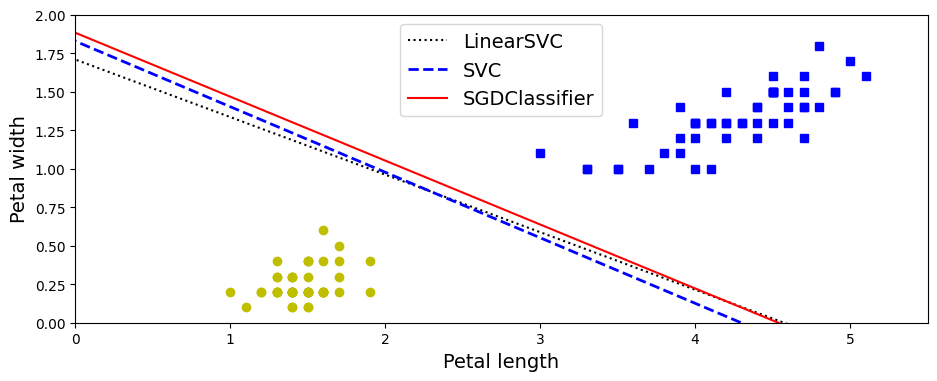

In [4]:
w1 = -linear_svc.coef_[0, 0]/linear_svc.coef_[0, 1]
b1 = -linear_svc.intercept_[0]/linear_svc.coef_[0, 1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_classifier.coef_[0, 0]/sgd_classifier.coef_[0, 1]
b3 = -sgd_classifier.intercept_[0]/sgd_classifier.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Similar decision boundaries are obtained by the three models.

<h4>9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-all to classify all 10 digits. </h4>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = digits["data"]
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

c:\Users\cozie\Documents\Learning\Hands on ML\venv\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


5


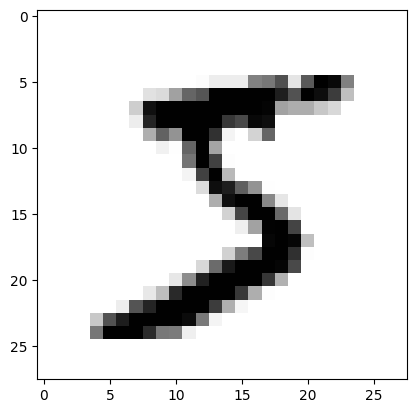

In [6]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
print(y[0])

In [7]:
linear_svc = LinearSVC(loss="hinge", random_state=42, dual=True)
linear_svc.fit(X_train, y_train)

c:\Users\cozie\Documents\Learning\Hands on ML\venv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, loss='hinge', random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, linear_svc.predict(X_test))

0.8626857142857143

The accuracy of SVM using a linear kernel is 86%, lets scale our data and try again.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_svc = LinearSVC(loss="hinge", random_state=42, dual=True)
linear_svc.fit(X_train_scaled, y_train)

c:\Users\cozie\Documents\Learning\Hands on ML\venv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, loss='hinge', random_state=42)

In [10]:
accuracy_score(y_test, linear_svc.predict(X_test_scaled))

0.9125714285714286

The accuracy of SVM using a linear kernel is 91%, lets try a non-linear kernel.

In [11]:
svm = SVC(kernel="poly", degree=3, coef0=1, C=5)
svm.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=5, coef0=1, kernel='poly')

In [12]:
accuracy_score(y_test, svm.predict(X_test_scaled))

0.9558857142857143

Using a polynomial kernel of degree 3, the accuracy is 95%, lets try a RBF kernel.

In [13]:
svm = SVC(kernel="rbf", gamma="scale")
svm.fit(X_train_scaled[:1000], y_train[:1000])

SVC()

In [14]:
accuracy_score(y_train, svm.predict(X_train_scaled))

0.8779428571428571

Lets use randomized search to find the best hyperparameters for the RBF kernel.

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=2.176488509964134, gamma=0.0038255002424951567; total time=   0.3s
[CV] END ...C=2.176488509964134, gamma=0.0038255002424951567; total time=   0.3s
[CV] END ...C=2.176488509964134, gamma=0.0038255002424951567; total time=   0.3s
[CV] END ....C=6.829067370575121, gamma=0.013567822449462886; total time=   0.4s
[CV] END ....C=6.829067370575121, gamma=0.013567822449462886; total time=   0.3s
[CV] END ....C=6.829067370575121, gamma=0.013567822449462886; total time=   0.3s
[CV] END .....C=1.0582740976191176, gamma=0.0019822343880761; total time=   0.2s
[CV] END .....C=1.0582740976191176, gamma=0.0019822343880761; total time=   0.2s
[CV] END .....C=1.0582740976191176, gamma=0.0019822343880761; total time=   0.2s
[CV] END ....C=4.908519993423923, gamma=0.015705333360781535; total time=   0.3s
[CV] END ....C=4.908519993423923, gamma=0.015705333360781535; total time=   0.3s
[CV] END ....C=4.908519993423923, gamma=0.015705

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000137B1541700>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000137D3979550>},
                   verbose=2)

In [16]:
rnd_search_cv.best_score_

0.8439996883110655

In [17]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=7.739256427581852, gamma=0.002373590631500476)

In [18]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9997904761904762

We get a 99% accuracy, which is pretty good, using a RBF kernel with C=4.28 and gamma=0.001, lets see if we are overfitting.

In [19]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9644

Our final accuracy is 96%

<h4>10. Train an SVM regressor on the California housing dataset. </h4>

In [20]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.svm import LinearSVR     
linear_svr = LinearSVR(random_state=42)
linear_svr.fit(X_train_scaled, y_train)

c:\Users\cozie\Documents\Learning\Hands on ML\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\cozie\Documents\Learning\Hands on ML\venv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error

y_pred = linear_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.5732179179513553

In [43]:
y.max(), y.min(), y.mean(), y.std()

(5.00001, 0.14999, 2.068558169089147, 1.1539282040412253)

Having into account that the standard deviation of the target is 1.15 and the mean is 2.07, the MSE of 0.83 is pretty bad. Lets try using a rbf kernel.

In [39]:
from sklearn.svm import SVR
rbf_svr = SVR(kernel="rbf", gamma="scale")    
rbf_svr.fit(X_train_scaled, y_train)   

SVR()

In [44]:
y_pred = rbf_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse


0.351006656848355

We get a better result, so now lets use randomized search to find the best hyperparameters.

In [45]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search = RandomizedSearchCV(rbf_svr, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search.fit(X_train_scaled, y_train)                 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  13.5s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  12.7s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  12.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  12.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  12.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  12.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  13.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  15.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  11.4s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  11.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  11.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000137D42DD460>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000137D4255550>},
                   random_state=42, verbose=2)

In [47]:
y_pred = rnd_search.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred) 
print("MSE:", mse, "\nRMSE:", np.sqrt(mse))         

MSE: 0.3454960725069699 
RMSE: 0.5877891394938919


Our MSE is 0.34 and RMSE is 0.58, which is good.